In [1]:
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
from helstrom import Helstrom
import matplotlib
from math import erf

In [2]:
hel = Helstrom(alpha=0.4, ep = 0.01)
helstrom_avg = hel()

def homodyne(a=0.4, ep=0.01):
    beta = np.sqrt(ep)*a
    return (2+ erf(a) + erf(beta))/4

In [3]:
homo = []
helstroms=[]
eps = []
for k in range(1,6):
    for j in np.linspace(10**(-k+1), 10**(-k), 10):
        eps.append(j)
eps = eps[::-1]
for ep in eps:
    homo.append(homodyne(0.4, ep))
    
    hel = Helstrom(alpha=0.4, ep = ep)
    helstrom_avg = hel()
    helstroms.append(helstrom_avg)


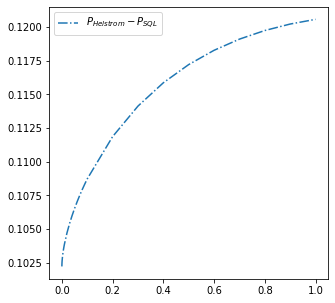

In [4]:
plt.figure(figsize=(5,5))
plt.plot(eps,np.array(helstroms)-np.array(homo),'-.', label=r'$P_{Helstrom}-P_{SQL}$')
plt.legend()
plt.savefig("homodyne_helstrom.png")

/home/cooper-cooper/Desktop/marek/agent.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.q_table = np.array(self.q_table)
/home/cooper-cooper/Desktop/marek/agent.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.n_table = np.array(self.n_table)


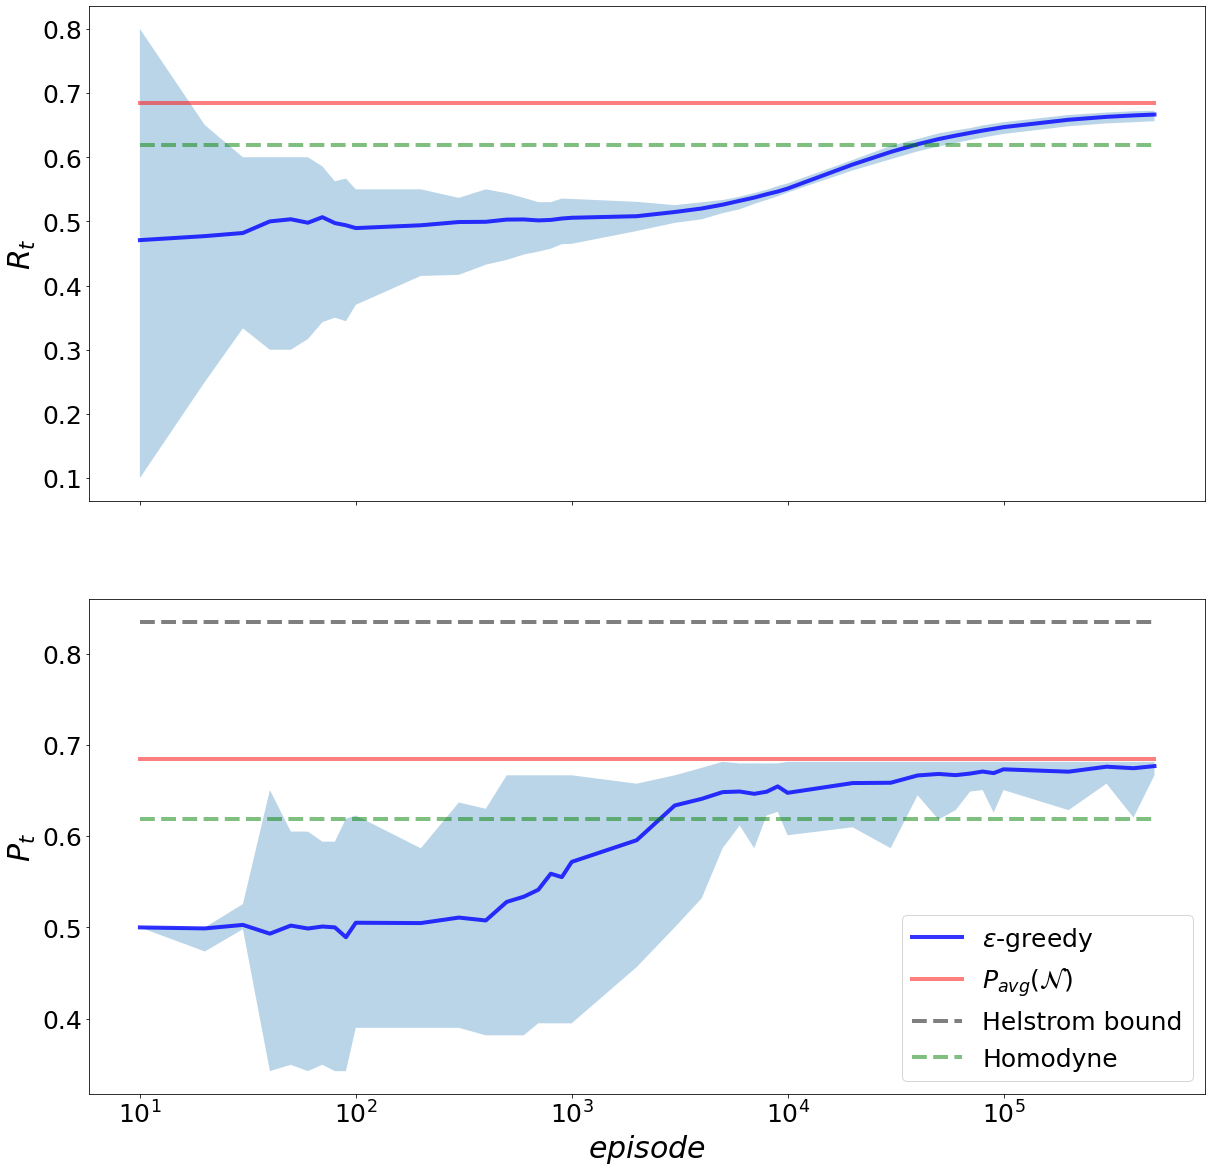

In [46]:


layers = 2
n_actions = 10
nrun=3
folder = str(layers)+"L_"+str(n_actions)+"a"+"_LC"

times, rcum, pt = np.load(folder+"/run_{}/tables/learning_curves.npy".format(nrun))
min_r_cumulative, max_r_cumulative, min_pr_gre, max_pr_gre =  np.load(folder+"/run_{}/tables/minimax.npy".format(nrun))
agent = Agent(layers=layers,n_actions=n_actions)
o_avg = np.load("resultsdp/0.01/2L_objective_function.npy")

ticks=[1]
for k in np.log10(times):
    if np.round(k,4) == k:
        ticks.append(10**k)
#ticks.append(10**5)
#ticks.append(5*10**5)

tickslabels=[r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$10^{5}$',r'$5 \; 10^{5}$']



color_pbound = "red"
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.plot(np.log10(times), rcum/times,  linewidth=4, alpha=0.8, color="blue")
plt.fill_between(np.log10(times), min_r_cumulative/times, max_r_cumulative/times, alpha=0.3)
plt.plot(np.log10(times), np.ones(len(times))*o_avg[0,0], linewidth=4, alpha=0.5, color=color_pbound,label=r'$P_{avg(\mathcal{N})}$')
plt.plot(np.log10(times), np.ones(len(times))*homodyne(a=0.4,ep=0.01),'--', linewidth=4,alpha=0.5, color="green", label="Homodyne")

plt.xticks(visible=False )

plt.yticks(size=25 )

plt.ylabel(r'$R_t$',size=30)
plt.subplot(212)
plt.plot(np.log10(times),pt, linewidth=4, alpha=0.8, color="blue", label=r'$\epsilon$'+"-greedy")
plt.fill_between(np.log10(times), min_pr_gre, max_pr_gre,  alpha=0.3)


plt.plot(np.log10(times), np.ones(len(times))*o_avg[0,0], linewidth=4, alpha=0.5, color=color_pbound, label=r'$P_{avg}(\mathcal{N})$')
plt.plot(np.log10(times), np.ones(len(times))*helstrom_avg,'--', linewidth=4,alpha=0.5, color="black", label="Helstrom bound")
plt.plot(np.log10(times), np.ones(len(times))*homodyne(a=0.4,ep=0.01),'--', linewidth=4,alpha=0.5, color="green", label="Homodyne")

plt.xticks(ticks=np.log10(np.array(ticks))[1:],labels=tickslabels[:-1], size=25)
plt.yticks(size=25 )


plt.ylabel(r'$P_t$',size=30)
plt.xlabel(r'$episode$',size=30)
plt.legend(prop={"size":25}, loc="lower right")
plt.savefig("figures_iee/IEEE_epgredy.pdf")

In [41]:
times

array([1.e+01, 2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01,
       9.e+01, 1.e+02, 2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02,
       8.e+02, 9.e+02, 1.e+03, 2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03,
       7.e+03, 8.e+03, 9.e+03, 1.e+04, 2.e+04, 3.e+04, 4.e+04, 5.e+04,
       6.e+04, 7.e+04, 8.e+04, 9.e+04, 1.e+05, 2.e+05, 3.e+05, 4.e+05,
       5.e+05])